In [1]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (X_test, y_test) = mnist.load_data()

In [2]:
y = to_categorical(y)
y_test = to_categorical(y_test)

Sequential을 설정하여 학습할 layer를 쌓음.

In [3]:
# hidden layer를 쌓는 과정
net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
net.add(layers.Dense(10, activation='softmax'))
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [4]:
# preprocessing
X = X.reshape((60000, 28*28))
X = X/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

In [5]:
X_val = X[:10000]
partial_X = X[10000:]

y_val = y[:10000]
partial_y = y[10000:]

정확도를 높이기 위해 validation 사용.

In [6]:
val= net.fit(partial_X,partial_y,epochs=20, batch_size=128,validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 7s 19ms/step - loss: 0.2430 - acc: 0.9248 - val_loss: 0.1281 - val_acc: 0.9612
Epoch 2/20
391/391 [==============================] - 7s 18ms/step - loss: 0.0870 - acc: 0.9732 - val_loss: 0.1135 - val_acc: 0.9643
Epoch 3/20
391/391 [==============================] - 7s 18ms/step - loss: 0.0564 - acc: 0.9826 - val_loss: 0.1247 - val_acc: 0.9616
Epoch 4/20
391/391 [==============================] - 7s 18ms/step - loss: 0.0457 - acc: 0.9857 - val_loss: 0.0882 - val_acc: 0.9765
Epoch 5/20
391/391 [==============================] - 7s 18ms/step - loss: 0.0366 - acc: 0.9880 - val_loss: 0.1020 - val_acc: 0.9736
Epoch 6/20
391/391 [==============================] - 7s 18ms/step - loss: 0.0308 - acc: 0.9906 - val_loss: 0.0795 - val_acc: 0.9796
Epoch 7/20
391/391 [==============================] - 7s 19ms/step - loss: 0.0245 - acc: 0.9922 - val_loss: 0.1086 - val_acc: 0.9747
Epoch 8/20
391/391 [==============================] - 7s 18ms/step - 

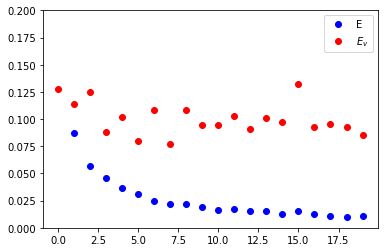

In [7]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']

x = np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='$E_v$')
plt.ylim(0,0.2)
plt.legend()

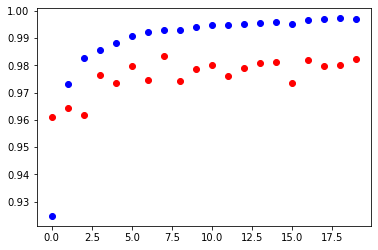

In [8]:
acc = val_dict['acc']
val_acc = val_dict['val_acc']
plt.plot(x,acc,'bo',label='Accuracy')
plt.plot(x,val_acc,'ro',label='A_v')

In [9]:
net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


test data를 분류한 결과 0.9812 정도의 정확로로 MNIST data를 분류할 수 있다.

In [10]:
test_loss, test_acc = net.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0960 - acc: 0.9812
